Name: Ignacio, Edrie<br>
Course and Section: CPE019 - CPE32S1<br>
Date of Submission: 06/14/2024<br>
Instructor: Engr. Roman M. Richard<br>

**Part 1: The Dataset**

In [16]:
#Step 1: Loading the Dataset From a File.

import pandas as pd
brainFile = './brainsize.txt'
brainFrame = pd.read_csv(brainFile, delimiter='\t')

In [17]:
#Step 2: Verifying the dataframe.

brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


**Part 2: Scatterplot Graphs and Correlatable Variables**

In [18]:
#Step 1: The pandas describe() method.

brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [19]:
#Step 2: Scatterplot graphs
#a. Load the required modules.

import numpy as np
import matplotlib.pyplot as plt

In [20]:
print(brainFrame.columns)

Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')


In [21]:
print(brainFrame.head())

   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0  Female   133  132  124   118.0    64.5     816932
1    Male   140  150  124     NaN    72.5    1001121
2    Male   139  123  150   143.0    73.3    1038437
3    Male   133  129  128   172.0    68.8     965353
4  Female   137  132  134   147.0    65.0     951545


In [22]:
#b. Separate the data.

menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

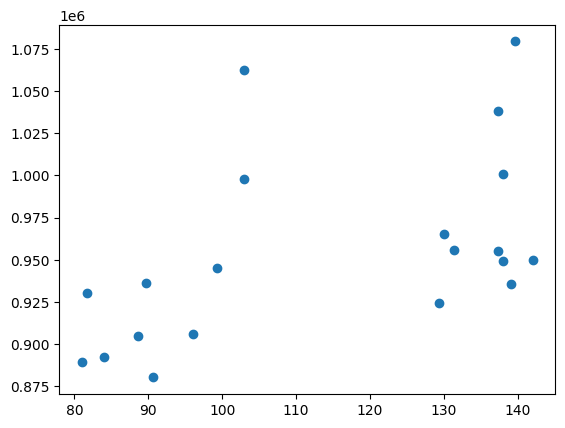

In [27]:
#c. Plot the graphs.

menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

In [24]:
# Graph the women-only filtered dataframe
#womenMeanSmarts = ?
#plt.scatter(?, ?)
plt.show()
%matplotlib inline

**Part 3: Calculating Correlation with Python**

In [38]:
#Step 1: Calculate correlation against brainFrame.

brainFrame.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


In [40]:
womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


In [41]:
# Code cell 10
# Use corr() for the male-only dataframe with the pearson method
#?.corr(?)

**Part 4: Visualizing**

In [44]:
#Step 1: Install Seaborn.

!pip install seaborn

<Axes: >

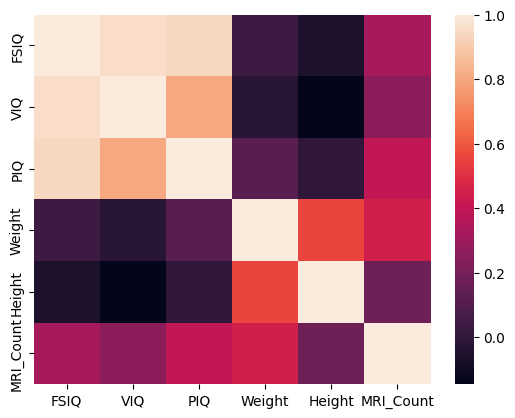

In [46]:
#Step 2: Plot the correlation heatmap.

import seaborn as sns
wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

<Axes: >

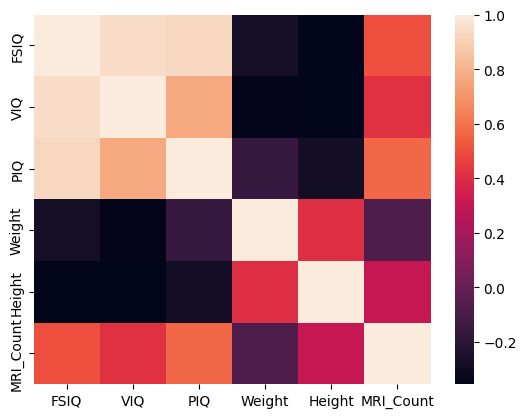

In [48]:
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Many variable pairs present correlation close to zero. What does that mean?
- It means that one variable pair does not influence the other. In other words the ripple effect of altering correlation of a particular dataset which in this case is men and women can in no way predict the consequences of the other.

Why separate the genders?
- When it is a matter of separating the genders, it is better to visualize the results of data without any distractions. The other is that it is easier to compare the two main subject of comparison if it is set in this format more than combining them in one heatmap.

What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.
- The correlation of genetics, age, cognitive function, neurological health, and brain size (MRI_Count) could also be closer. It will be possible to say that the relationships are predicted depending on the demography and that of the context of the study. For example, healthy subject brain size cognitive function might exist; however, with neuro-degenerative diseases, it would be expected in a sample of old people. However, these relations differ in terms of magnitude and direction by the study type, participants, and other factors.

**SUPPLEMENTARY ACTIVITY**

Dataset: Census.gov State QuickFacts https://data.world/aaronhoffman/census-gov-state-quickfacts

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334839 entries, 0 to 334838
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   caseNumber     334839 non-null  int64  
 1   treatmentDate  334839 non-null  object 
 2   statWeight     334839 non-null  float64
 3   stratum        334839 non-null  object 
 4   age            334839 non-null  int64  
 5   sex            334837 non-null  object 
 6   race           205014 non-null  object 
 7   diagnosis      334839 non-null  int64  
 8   bodyPart       334839 non-null  int64  
 9   disposition    334839 non-null  int64  
 10  location       334839 non-null  int64  
 11  product        334839 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 30.7+ MB
None
   caseNumber treatmentDate  statWeight stratum  age     sex   race  \
0   150733174     7/11/2015     15.7762       V    5    Male    NaN   
1   150734723      7/6/2015     83.

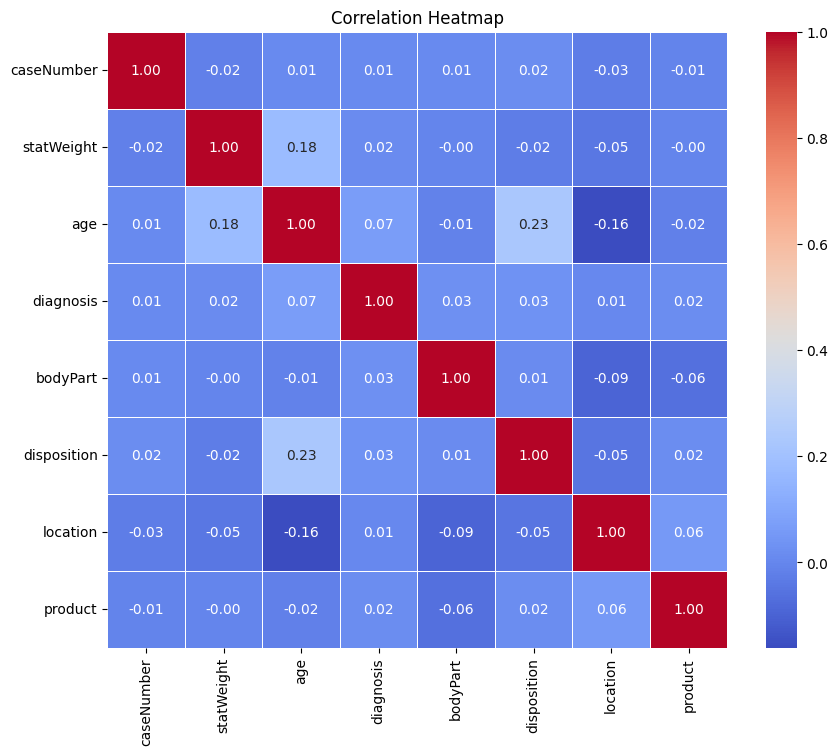

Correlations: 
             caseNumber  statWeight       age  diagnosis  bodyPart  \
caseNumber     1.000000   -0.016605  0.011187   0.007908  0.008395   
statWeight    -0.016605    1.000000  0.178743   0.016024 -0.004664   
age            0.011187    0.178743  1.000000   0.070075 -0.012186   
diagnosis      0.007908    0.016024  0.070075   1.000000  0.029604   
bodyPart       0.008395   -0.004664 -0.012186   0.029604  1.000000   
disposition    0.017628   -0.024783  0.226759   0.031029  0.011644   
location      -0.028467   -0.046759 -0.160651   0.006771 -0.094221   
product       -0.008024   -0.004638 -0.015819   0.018989 -0.063878   

             disposition  location   product  
caseNumber      0.017628 -0.028467 -0.008024  
statWeight     -0.024783 -0.046759 -0.004638  
age             0.226759 -0.160651 -0.015819  
diagnosis       0.031029  0.006771  0.018989  
bodyPart        0.011644 -0.094221 -0.063878  
disposition     1.000000 -0.049188  0.017968  
location       -0.049188 

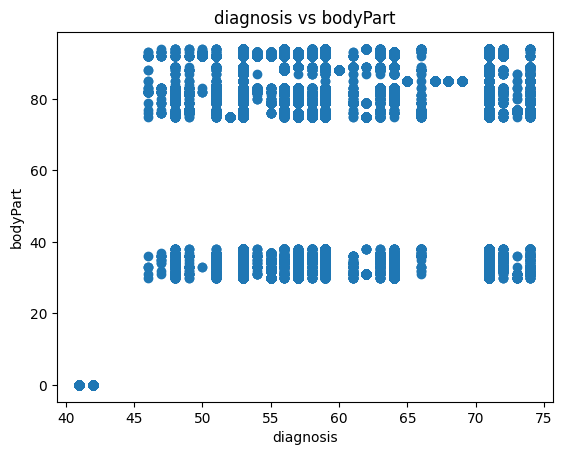

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dsfile = 'nss15.txt'
ds = pd.read_csv(dsfile, delimiter=',')

print("Dataset Info:")
print(ds.info())

print(ds.head())

numeric_cols = ds.select_dtypes(include=['int64', 'float64']).columns
corr_mtrx = ds[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mtrx, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

print("Correlations: ")
print(corr_mtrx)

plt.scatter(ds['diagnosis'], ds['bodyPart'])
plt.title("diagnosis vs bodyPart")
plt.xlabel("diagnosis")
plt.ylabel("bodyPart")
plt.show()

Column names:
Index(['caseNumber', 'treatmentDate', 'statWeight', 'stratum', 'age', 'sex',
       'race', 'diagnosis', 'bodyPart', 'disposition', 'location', 'product'],
      dtype='object')
Correlation matrix for males:
             caseNumber  statWeight       age  diagnosis  bodyPart  \
caseNumber     1.000000   -0.020032  0.009848   0.009302  0.008602   
statWeight    -0.020032    1.000000  0.175405   0.019531 -0.004820   
age            0.009848    0.175405  1.000000   0.104307 -0.016994   
diagnosis      0.009302    0.019531  0.104307   1.000000  0.023233   
bodyPart       0.008602   -0.004820 -0.016994   0.023233  1.000000   
disposition    0.020800   -0.028165  0.209429   0.050915 -0.003235   
location      -0.032910   -0.048328 -0.158367  -0.001482 -0.106239   
product       -0.008925   -0.004697  0.000336   0.015421 -0.069011   

             disposition  location   product  
caseNumber      0.020800 -0.032910 -0.008925  
statWeight     -0.028165 -0.048328 -0.004697  
age   

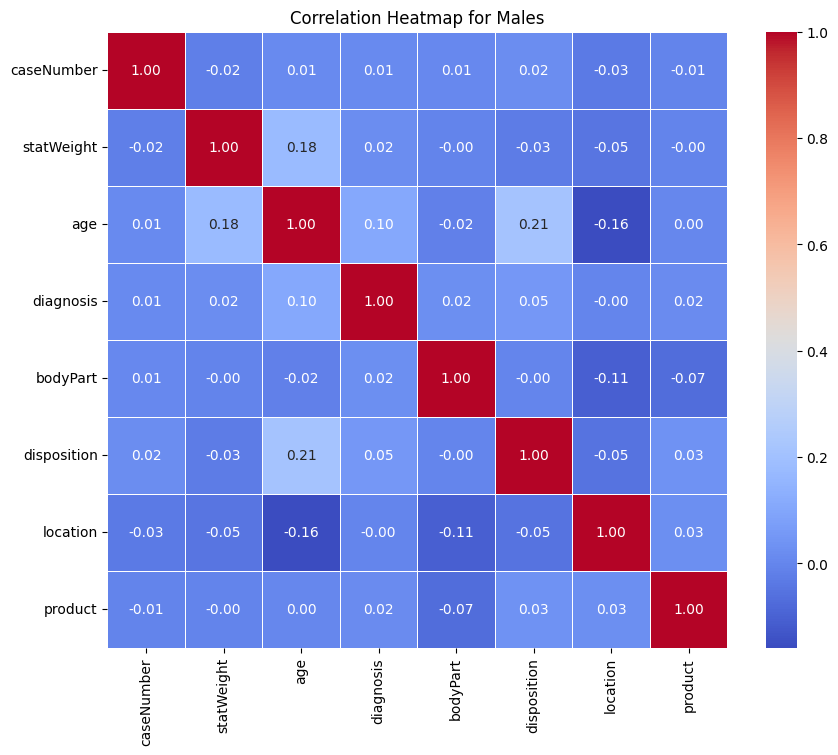

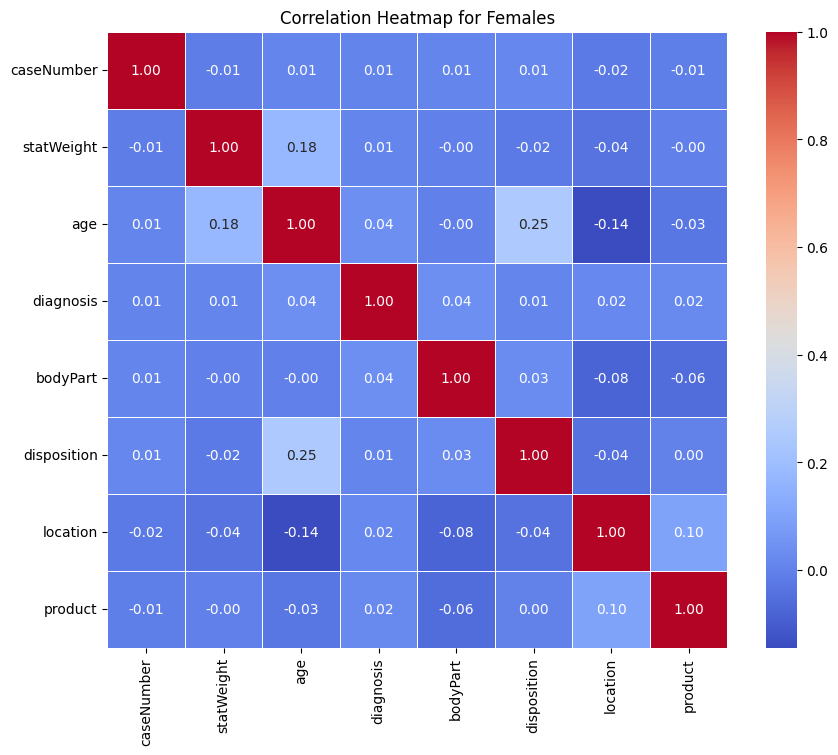

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dsfile = 'nss15.txt'
brainFrameX = pd.read_csv(dsfile, sep=',')

# Verify column names
print("Column names:")
print(brainFrameX.columns)

# Separation Data
maleds = brainFrameX[brainFrameX['sex'] == 'Male']
femaleds = brainFrameX[brainFrameX['sex'] == 'Female']

# Select only numeric columns for correlation matrix
numeric_cols = maleds.select_dtypes(include=['int64', 'float64']).columns
male_corr = maleds[numeric_cols].corr(method='pearson')
female_corr = femaleds[numeric_cols].corr(method='pearson')

# Display the correlation matrix for males
print("Correlation matrix for males:")
print(male_corr)

# Display the correlation matrix for females
print("Correlation matrix for females:")
print(female_corr)

# Plot the correlation heatmap for males
plt.figure(figsize=(10, 8))
sns.heatmap(male_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Males")
plt.show()

# Plot the correlation heatmap for females
plt.figure(figsize=(10, 8))
sns.heatmap(female_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Females")
plt.show()


Column names:
Index(['caseNumber', 'treatmentDate', 'statWeight', 'stratum', 'age', 'sex',
       'race', 'diagnosis', 'bodyPart', 'disposition', 'location', 'product'],
      dtype='object')
Correlation matrix for females:
             caseNumber  statWeight       age  diagnosis  bodyPart  \
caseNumber     1.000000   -0.012730  0.012493   0.006312  0.008175   
statWeight    -0.012730    1.000000  0.176074   0.011819 -0.003731   
age            0.012493    0.176074  1.000000   0.037605 -0.004897   
diagnosis      0.006312    0.011819  0.037605   1.000000  0.037095   
bodyPart       0.008175   -0.003731 -0.004897   0.037095  1.000000   
disposition    0.013940   -0.021932  0.246473   0.008387  0.029540   
location      -0.022613   -0.037347 -0.143841   0.018667 -0.080784   
product       -0.006868   -0.003375 -0.029732   0.023581 -0.057604   

             disposition  location   product  
caseNumber      0.013940 -0.022613 -0.006868  
statWeight     -0.021932 -0.037347 -0.003375  
age 

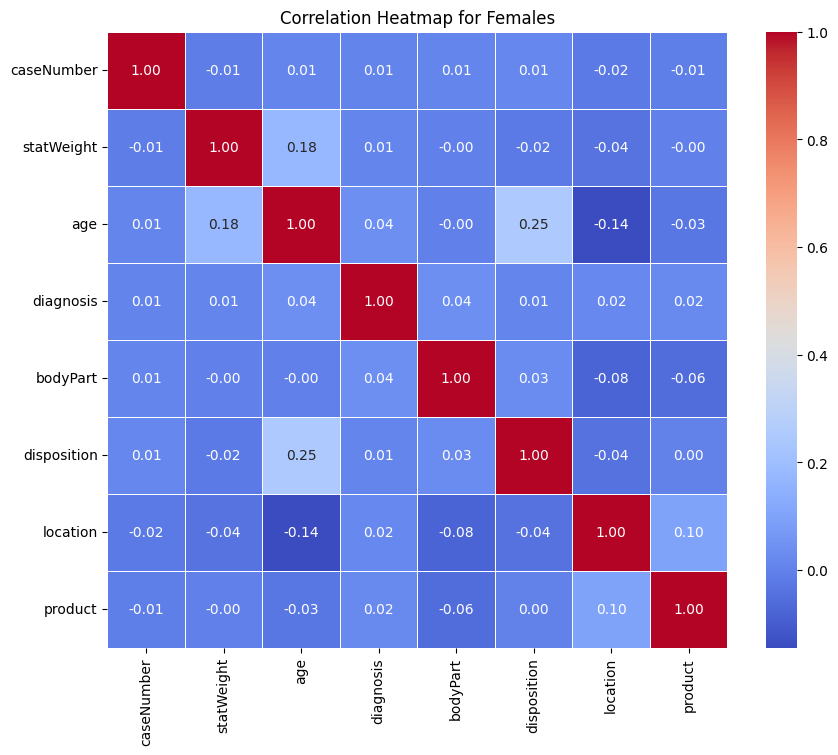

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dsfile = 'nss15.txt'
brainFrameX = pd.read_csv(dsfile, sep=',')

# Verify column names
print("Column names:")
print(brainFrameX.columns)

# Separate Data by Sex
maleds = brainFrameX[brainFrameX['sex'] == 'Male']
femaleds = brainFrameX[brainFrameX['sex'] == 'Female']

# Select only numeric columns for correlation matrix
numeric_cols = femaleds.select_dtypes(include=['int64', 'float64']).columns
female_corr = femaleds[numeric_cols].corr(method='pearson')

# Display the correlation matrix for females
print("Correlation matrix for females:")
print(female_corr)

# Plot the correlation heatmap for females
plt.figure(figsize=(10, 8))
sns.heatmap(female_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Females")
plt.show()


**CONCLUSION**

In the course of this data analysis endeavor, I got to know methods to comprehend data employing Python libraries like motplotlib besides mannerisms to exhibit data with heat mapping and charting. In the additional activity, I were more about data analysis, especially because in the assignment we were supposed to work with a real-life data set, and the data set I chosen is a data set for US product injuries. I had challenges grasping and executing the request within the set period but was able to achieve the task. In conclusion, this project has made me more conscious with data in Python and at the same time enhance my general knowledge on coding. In the future, I would like to know even more and am definitely interested in what one can perform in the given course in his or her future job.